C:\Users\ibnuh\AppData\Local\Temp\ipykernel_23160\2490530071.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_company.index, y=avg_price_by_company.values, palette="viridis")


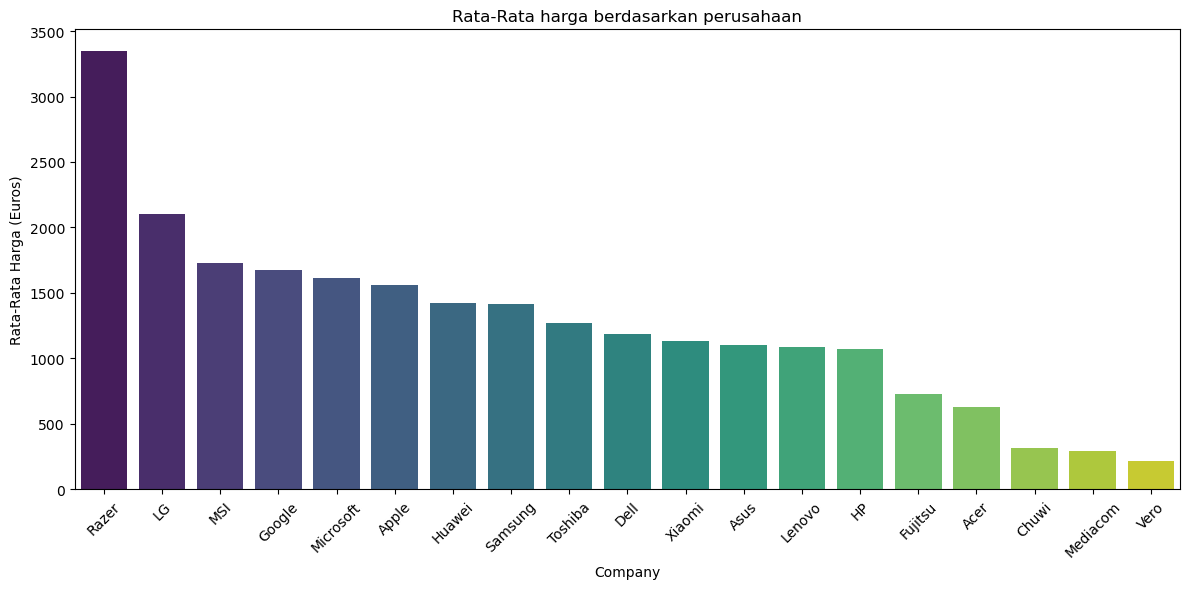

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("laptop_price.csv", encoding="latin1")

# Calculate average price by company
avg_price_by_company = df.groupby("Company")["Price_euros"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_company.index, y=avg_price_by_company.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Rata-Rata Harga (Euros)")
plt.title("Rata-Rata harga berdasarkan perusahaan")
plt.tight_layout()
plt.show()


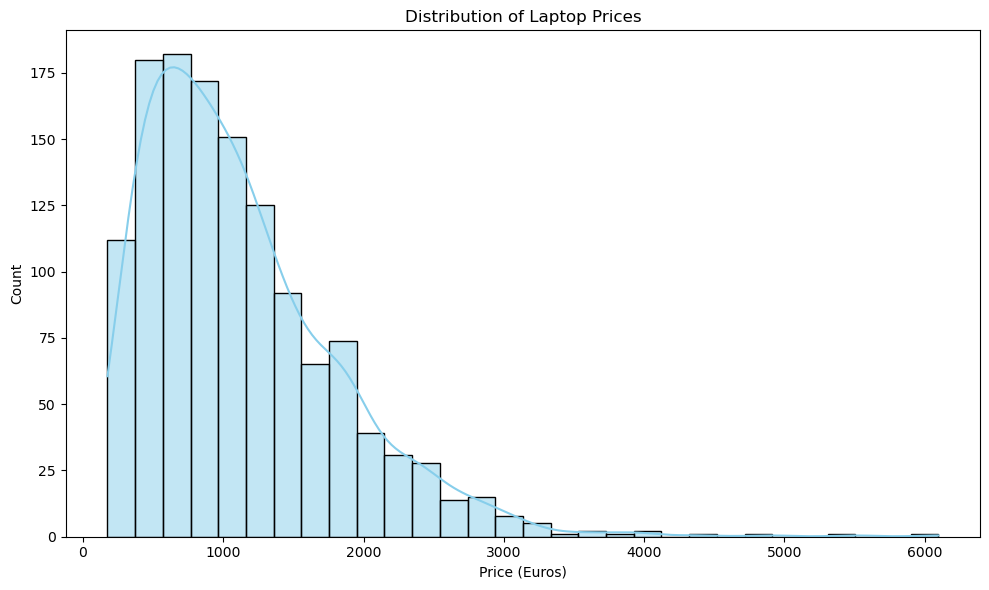

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("laptop_price.csv", encoding="latin1")

# Plot histogram of laptop prices
plt.figure(figsize=(5, 6))
sns.histplot(df["Price_euros"], bins=30, kde=True, color="skyblue")
plt.xlabel("Price (Euros)")
plt.ylabel("Count")
plt.title("Distribution of Laptop Prices")
plt.tight_layout()
plt.show()


In [53]:
# Calculate statistics
mean_price = df["Price_euros"].mean()
median_price = df["Price_euros"].median()
mode_price = df["Price_euros"].mode()[0]  # mode() returns a Series

# Print results
print(f"Mean(euro): {mean_price:.2f}")
print(f"Median(euro): {median_price:.2f}")
print(f"Modus(euro): {mode_price:.2f}")


Mean(euro): 1123.69
Median(euro): 977.00
Modus(euro): 1099.00


Mean Squared Error: 241631.82214759142
R² Score: 0.5487564814726573


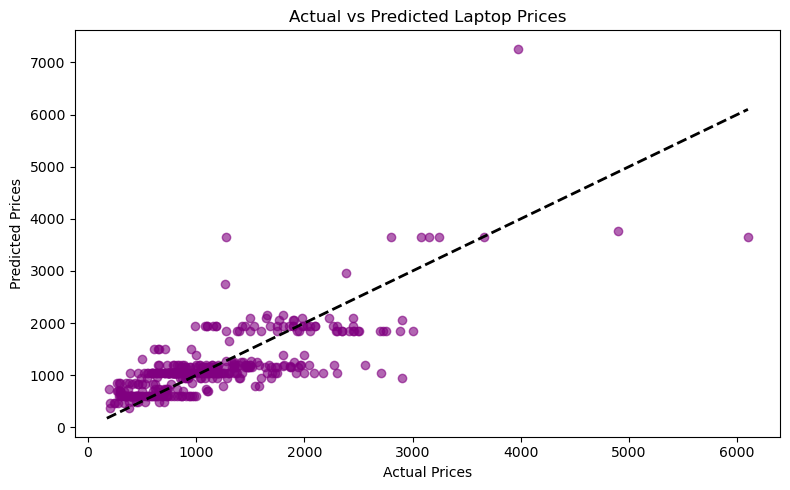

In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("laptop_price.csv", encoding="latin1")

# Preprocess: clean and convert 'Ram' and 'Inches'
df["Ram"] = df["Ram"].str.replace("GB", "").astype(int)
df["Inches"] = df["Inches"].astype(float)

# Select features and target
X = df[["Ram", "Inches"]]
y = df["Price_euros"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Optional: plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Laptop Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.tight_layout()
plt.show()


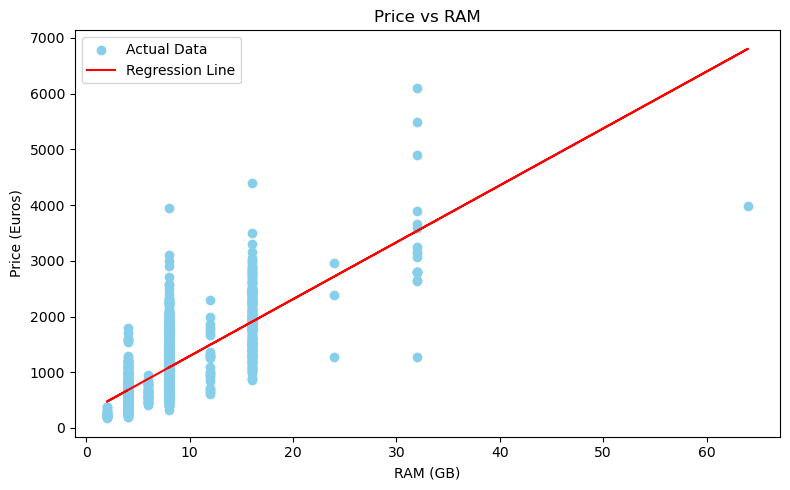

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
df = pd.read_csv("laptop_price.csv", encoding="latin1")

# Preprocess RAM
df["Ram"] = df["Ram"].str.replace("GB", "").astype(int)

# Independent and dependent variables
X = df[["Ram"]]  # 2D array
y = df["Price_euros"]

# Model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="skyblue", label="Actual Data")
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (Euros)")
plt.title("Price vs RAM")
plt.legend()
plt.tight_layout()
plt.show()


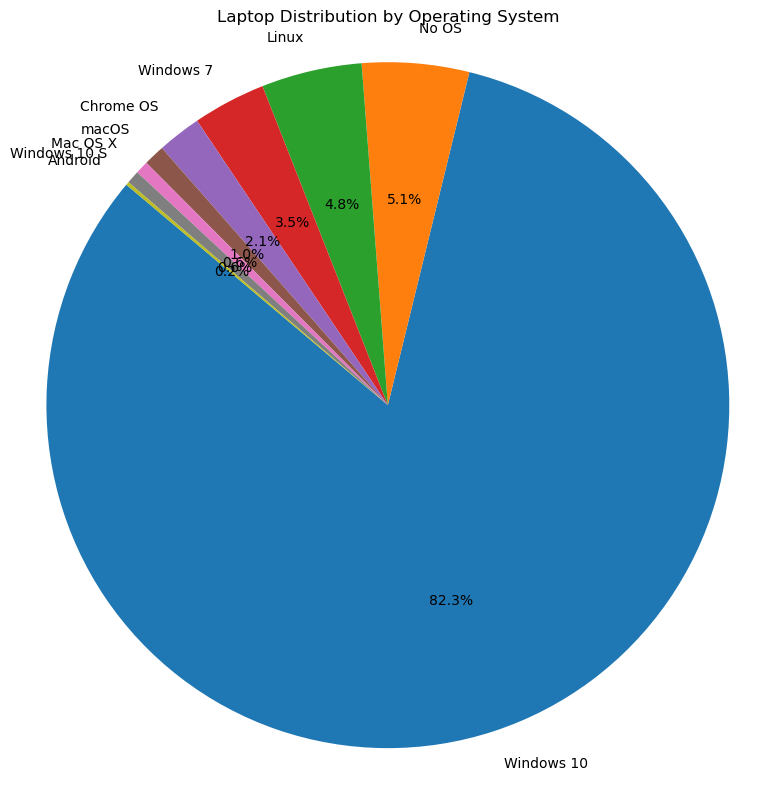

In [29]:
# Count how many laptops per OS
os_counts = df["OpSys"].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(os_counts, labels=os_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Laptop Distribution by Operating System")
plt.axis("equal")
plt.tight_layout()
plt.show()


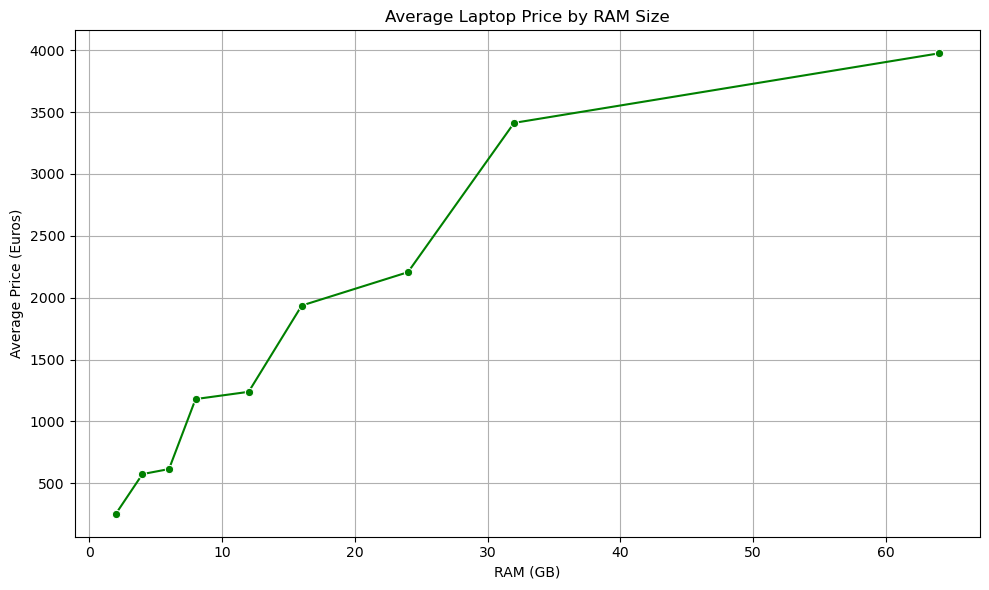

In [31]:
df["Ram"] = df["Ram"].str.replace("GB", "").astype(int)
ram_price = df.groupby("Ram")["Price_euros"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x="Ram", y="Price_euros", data=ram_price, marker="o", color="green")
plt.title("Average Laptop Price by RAM Size")
plt.xlabel("RAM (GB)")
plt.ylabel("Average Price (Euros)")
plt.grid(True)
plt.tight_layout()
plt.show()



[Price vs RAM]
Correlation Coefficient (R): 0.7512


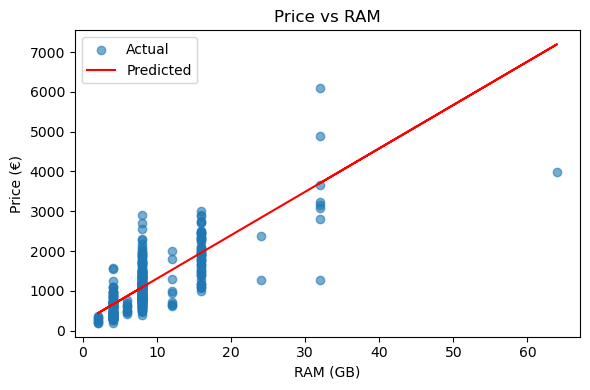


[Price vs Memory]
Correlation Coefficient (R): 0.2334


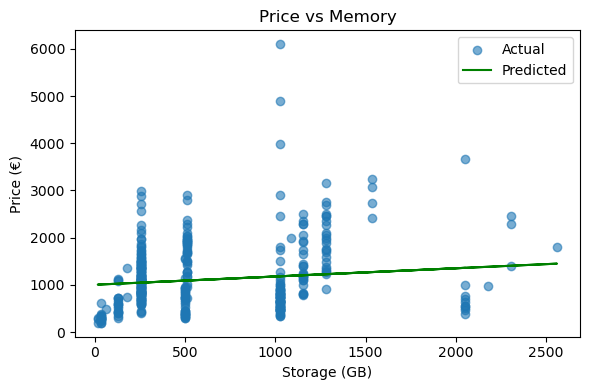

In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import re

# Load dataset
df = pd.read_csv("laptop_price.csv", encoding="latin1")

# --- Clean RAM ---
df["Ram"] = df["Ram"].str.replace("GB", "").astype(int)

# --- Clean Memory (convert to total GB) ---
def extract_storage(mem_str):
    mem_str = mem_str.replace(" ", "+")  # replace spaces with '+' for split
    parts = mem_str.split('+')
    total = 0
    for part in parts:
        if 'TB' in part:
            total += float(re.search(r'\d+\.?\d*', part).group()) * 1024
        elif 'GB' in part:
            total += float(re.search(r'\d+\.?\d*', part).group())
    return int(total)

df["Memory_GB"] = df["Memory"].apply(extract_storage)

# -------------------------------
# 1️⃣ Regression: Price vs RAM
# -------------------------------
X_ram = df[["Ram"]]
y = df["Price_euros"]

X_train, X_test, y_train, y_test = train_test_split(X_ram, y, test_size=0.3, random_state=42)
model_ram = LinearRegression()
model_ram.fit(X_train, y_train)
y_pred_ram = model_ram.predict(X_test)

r_ram = np.corrcoef(y_test, y_pred_ram)[0, 1]
print(f"\n[Price vs RAM]")
print(f"Correlation Coefficient (R): {r_ram:.4f}")

# Plot
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, label="Actual", alpha=0.6)
plt.plot(X_test, y_pred_ram, color='red', label="Predicted")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (€)")
plt.title("Price vs RAM")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# 2️⃣ Regression: Price vs Memory
# -------------------------------
X_mem = df[["Memory_GB"]]

X_train, X_test, y_train, y_test = train_test_split(X_mem, y, test_size=0.3, random_state=42)
model_mem = LinearRegression()
model_mem.fit(X_train, y_train)
y_pred_mem = model_mem.predict(X_test)

r_mem = np.corrcoef(y_test, y_pred_mem)[0, 1]
print(f"\n[Price vs Memory]")
print(f"Correlation Coefficient (R): {r_mem:.4f}")

# Plot
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, label="Actual", alpha=0.6)
plt.plot(X_test, y_pred_mem, color='green', label="Predicted")
plt.xlabel("Storage (GB)")
plt.ylabel("Price (€)")
plt.title("Price vs Memory")
plt.legend()
plt.tight_layout()
plt.show()
